# Hotel Bookings Analysis


# Importing libraries

In [1]:
# For data
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# For country name
import pycountry as pc

# Read the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/kevinasyraf/find-it-2020-dac/master/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
# Shape of the dataset
data.shape

(119390, 32)

In [4]:
#Let us get some glimps of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Check if any nulls values are present in dataset
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

From above information we can see that we have null values in 3 columns (market_segment,agent,company). We dont need company column so let's delete it from dataset

In [6]:
# Removing a column from dataframe
data = data.drop('company', axis = 1)

In [7]:
# Filling null values
data = data.fillna({
    'children' : 0,
    'agent' : 0,
    'country': 'Unknown',
})

In [8]:
any(data.isna().sum())

False

In [9]:
# Cluming few columns and removing then all at once 
zero_guests = list(data.loc[data["adults"]
                   + data["children"]
                   + data["babies"]==0].index)
data.drop(data.index[zero_guests], inplace=True)

In [10]:
# Get the shape (no of rows and no of cloumns) of dataframe
data.shape

(119210, 31)

### 1. How many bookings were cancelled?

In [11]:
# Defining a functions to get the number of bookings cancelled
def get_count(series, limit=None):
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
        
    x = series.index                  # unique values
    y = series/series.sum()*100       # count of unique values
    
    return x.values, y.values

In [12]:
# Using get count functions
x, y = get_count(data["is_canceled"])
x,y

(array([0, 1], dtype=int64), array([62.92341247, 37.07658753]))

is_canceled column have two unique values 0 and 1.

1 represents "booking got cancelled"

0 represents "guests have booked and dd check-in"

Now let us plot this result.

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


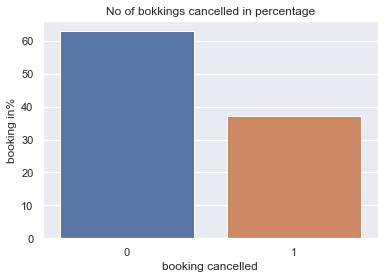

In [13]:
# Plotting a bar graph using seaborn library
sns.set(style='darkgrid')
ax = sns.barplot(x,y, data= data)
ax.set(xlabel='booking cancelled',ylabel='booking in%')
plt.title('No of bokkings cancelled in percentage')
plt.show()

From the graph we get to know that bookings got cancelled 37% of time. While booking guest did checked-in and did not cancelled the booking 63% of time.

## 2. What is the booking ratio between Resort Hotel and City Hotel?

In [14]:
# Using get count function getting the ratio between two hotels
data_not_cancelled = data[data['is_canceled'] == 0]
x, y = get_count(data_not_cancelled['hotel'])

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


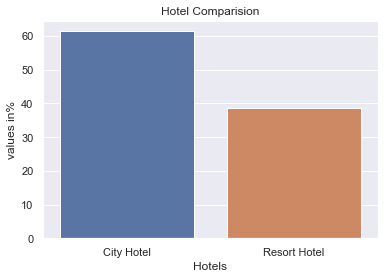

In [15]:
# Plotting a bar graph using seaborn library
sns.set(style='darkgrid')
ax = sns.barplot(x,y, data= data)
ax.set(xlabel='Hotels',ylabel='values in%')
plt.title('Hotel Comparision')
plt.show()

More than 60% of the population prefered to book City Hotel

## 3. What is the percentage of bookin for each year?

In [16]:
# Booking done every year 
x, y = get_count(data_not_cancelled['arrival_date_year'])

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


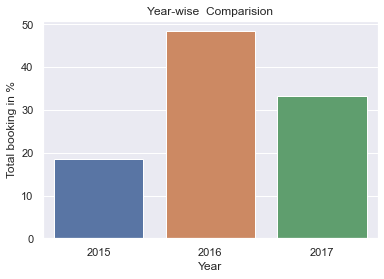

In [17]:
# Plotting a bar graph using seaborn library
sns.set(style='darkgrid')
ax = sns.barplot(x,y, data= data)
ax.set(xlabel='Year',ylabel='Total booking in %')
plt.title('Year-wise  Comparision')
plt.show()

More than double bookings were made in year 2016 compared to previous year. But booking decreased by 15% in the next year.

### Year-wise and hotel wise side by side bar graph

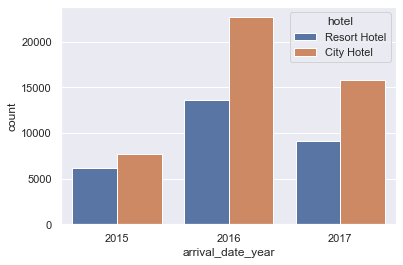

In [18]:
# Plotting a bar graph using seaborn library
sns.countplot(x = 'arrival_date_year', data = data_not_cancelled, hue='hotel')
plt.show()

## 4. Which is the busiest month for hotels?

In [19]:
# Let us see the logic to find the busiest month
new_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sorted_months = data_not_cancelled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


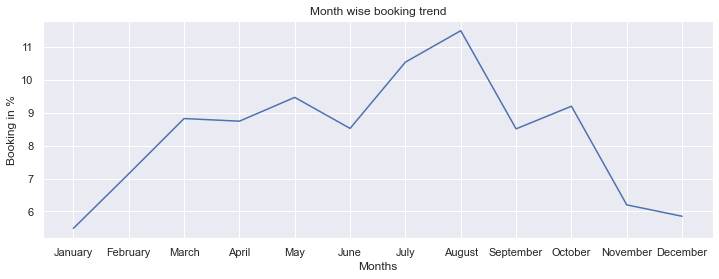

In [20]:
# Plotting a line graph using seaborn library
plt.figure(figsize=(12, 4))
ax = sns.lineplot(x, y, data=sorted_months)
ax.set(xlabel='Months',ylabel= 'Booking in %')
plt.title('Month wise booking trend')
plt.show()

As we can see most of the bookings were made from July to August. The least bookings were made at the end and start of the year. Thus we can say hotels get busy after the month of June for next 5 months. 

### Comparing busiest month for both hotels

In [21]:
# New orders of month
new_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# For City Hotel
sorted_months = data_not_cancelled.loc[data.hotel == 'City Hotel', 'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1= sorted_months/sorted_months.sum()*100

# For Resort Hotel
sorted_months = data_not_cancelled.loc[data.hotel == 'Resort Hotel', 'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2= sorted_months/sorted_months.sum()*100

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


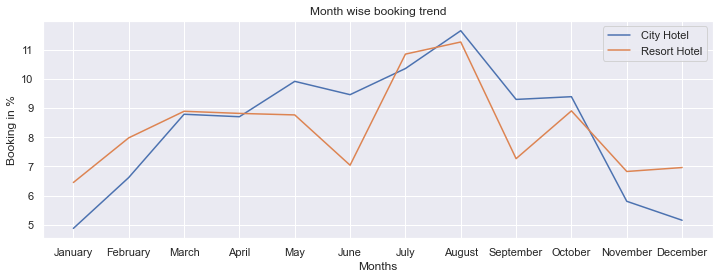

In [22]:
# Plotting a line graph using seaborn library
plt.figure(figsize=(12, 4))
ax = sns.lineplot(x1, y1, label=' City Hotel', data=sorted_months, sort=False)
ax = sns.lineplot(x2, y2, label=' Resort Hotel', data=sorted_months, sort=False)
ax.set(xlabel='Months',ylabel= 'Booking in %')
plt.title('Month wise booking trend')
plt.show()

From the graph we can see the trend is kind of similar with a small difference. Resort Hoytel has more booking at the start an end of the year, and lowered the booking in the month of June and September as compared to City hotel.

## 5. How much customers visit for both hotels monthwise in a year 

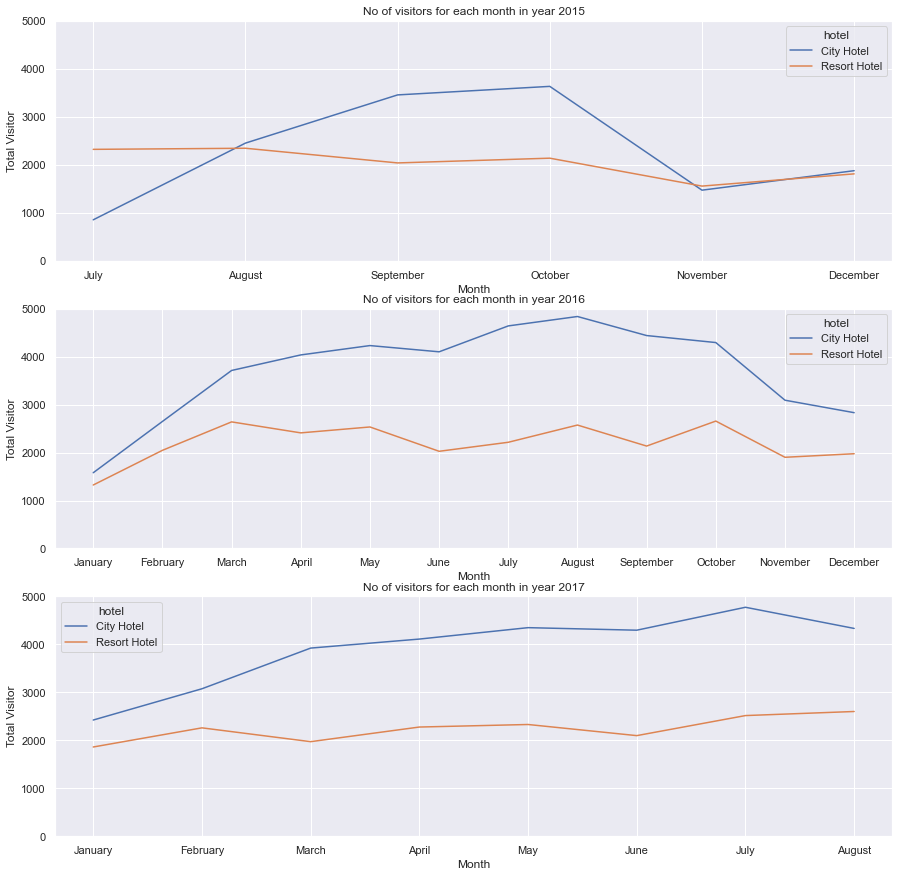

In [23]:
# Year wise distribution of total visitor
guest_data = data[data['is_canceled'] == 0].copy()
guests_monthly = guest_data[['hotel', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies']].sort_values('arrival_date_year')
guests_monthly['total visitors'] = guests_monthly['adults'] + guests_monthly['children'] + guests_monthly['babies']
guests_monthly = guests_monthly.astype({'total visitors' : int})
guests_monthly = guests_monthly.drop(['adults', 'children', 'babies'], axis=1)
guests_monthly['arrival_date_month'] = pd.Categorical(guests_monthly['arrival_date_month'], categories=new_order, ordered=True)
guests_monthly = guests_monthly.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'], as_index = False).sum()

# Plotting a line graph using seaborn library
f, ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2015],  ci="sd", ax=ax[0])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2016],  ci="sd", ax=ax[1])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2017],  ci="sd", ax=ax[2])

ax[0].set(title="No of visitors for each month in year 2015")
ax[0].set(xlabel="Month", ylabel="Total Visitor")
ax[0].set(ylim = (0,5000))

ax[1].set(title="No of visitors for each month in year 2016")
ax[1].set(xlabel="Month", ylabel="Total Visitor")
ax[1].set(ylim = (0,5000))

ax[2].set(title="No of visitors for each month in year 2017")
ax[2].set(xlabel="Month", ylabel="Total Visitor")
ax[2].set(ylim = (0,5000))

plt.show()

Hotel City did not had more guests in year 2015, but in next two years the hotel successed to attract more guests.
Where as Resort Hotel had less guests compared to other hotel. Also number of guests visited declined in year 2016 as compared to previous year. But somehow hotel managed to maintained the number of guests visited in next year.

## 6. From which country most guests came?

In [24]:
# Let us see the list of guests top counties
data_country = pd.DataFrame(data.loc[data['is_canceled'] != 1]['country'].value_counts())
data_country.index.name = 'country'
data_country.rename(columns={"country": "Number_of_Guests"}, inplace=True)
total_guests = data_country["Number_of_Guests"].sum()
data_country["Guests in %"] = round(data_country["Number_of_Guests"] / total_guests * 100, 2)
data_country.head(10)             

,Number_of_Guests,Guests in %
country,,
PRT,20977,27.97
GBR,9668,12.89
FRA,8468,11.29
ESP,6383,8.51
DEU,6067,8.09
IRL,2542,3.39
ITA,2428,3.24
BEL,1868,2.49
NLD,1716,2.29


In [25]:
# Writing a pipece of code too get the top 10 coountries
x,y = get_count(data_not_cancelled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

#plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

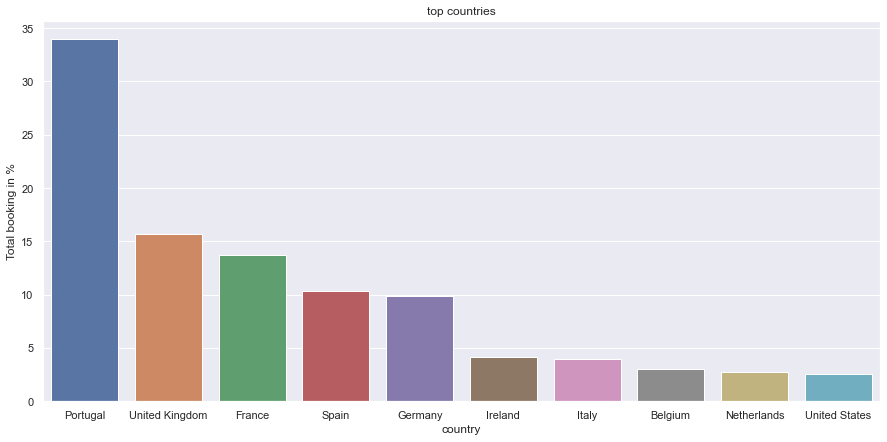

In [26]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(15, 7))
sns.set(style='darkgrid')
ax = sns.barplot(x= country_name, y=y, data=data_not_cancelled['country'])
ax.set(xlabel='country',ylabel='Total booking in %')
plt.title('top countries')
plt.show()

Portugal, UK, France, Spain, Germany, are the top countries from most guests came, more than 80% come from these 5 countries.

## 7. How long people stay in a hotel?

In [27]:
# Let us see the duratioon of halting 
total_nights = data_not_cancelled['stays_in_weekend_nights']+ data_not_cancelled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


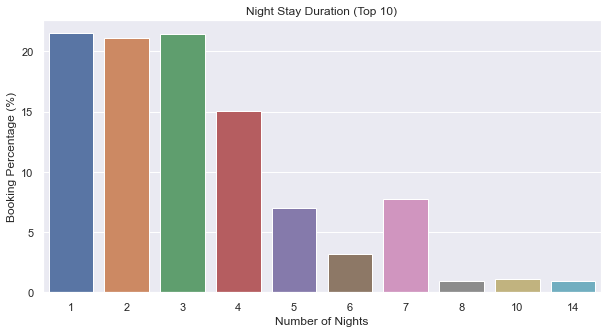

In [28]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
ax = sns.barplot(x,y)
ax.set(xlabel='Number of Nights', ylabel='Booking Percentage (%)')
plt.title('Night Stay Duration (Top 10)')
plt.show()

Most people stay for one, two or three days. Most of the guests came under this options.

In [29]:
# Making a new dataframe for total nights
data_not_cancelled.loc[:,'total_nights'] = data_not_cancelled['stays_in_weekend_nights']+ data_not_cancelled['stays_in_week_nights']

C:\Users\JARVIS\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\JARVIS\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


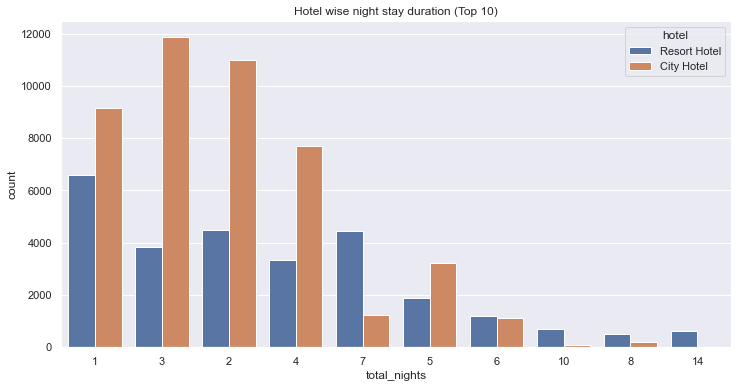

In [30]:
# Plotting a side by side bar graph using seaborn library
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=data_not_cancelled,
              order = data_not_cancelled.total_nights.value_counts().iloc[:10].index, ax=ax);

For Resort Hotel, the most popular stay duration is three, two, one and four days respectively. 
For City Hotel, the most popular stay duration is one, two, seven and four days respectively.

## 8.Which was the most booked accommodation type (Single, Couple, Family)?

In [31]:
## Select single, couple, multiple adults and family
single   = data_not_cancelled[(data_not_cancelled.adults==1) & (data_not_cancelled.children==0) & (data_not_cancelled.babies==0)]
couple   = data_not_cancelled[(data_not_cancelled.adults==2) & (data_not_cancelled.children==0) & (data_not_cancelled.babies==0)]
#n_adults = data_not_cancelled[(data_not_cancelled.adults>2) & (data_not_cancelled.children==0) & (data_not_cancelled.babies==0)]
family   = data_not_cancelled[data_not_cancelled.adults + data_not_cancelled.children + data_not_cancelled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/data_not_cancelled.shape[0]*100 for x in count]

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


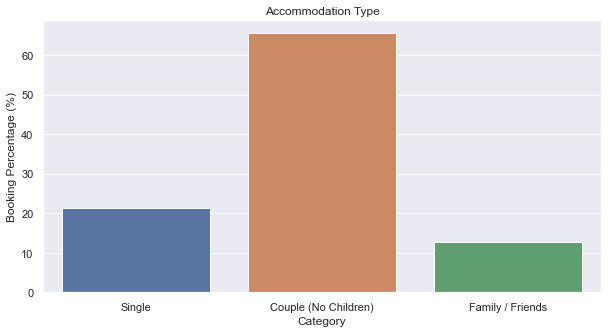

In [32]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
ax = sns.barplot(names, count_percent)
ax.set(xlabel='Category', ylabel='Booking Percentage (%)')
plt.title('Accommodation Type')
plt.show()

Couples are most popular accommodation type. So hotels can plan accordingly. 

## 9. Which room type have more fare for one person for a night stay?

In [33]:
# Lets us get a piece of code to sort the room type 
full_data_guests = data.copy()
full_data_guests = full_data_guests.loc[full_data_guests['is_canceled'] == 0]
full_data_guests['adr_pp'] = full_data_guests['adr'] / (full_data_guests['adults'] + full_data_guests['children'])
room_prices = full_data_guests[['hotel', 'reserved_room_type', 'adr_pp']].sort_values("reserved_room_type")

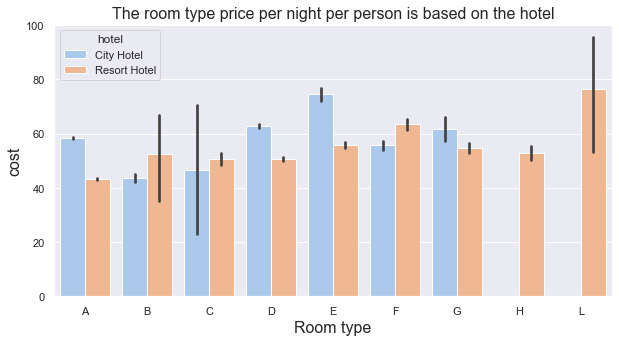

In [34]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(10,5))
sns.barplot(x='reserved_room_type', y='adr_pp', hue='hotel', data=room_prices, hue_order=['City Hotel', 'Resort Hotel'], palette='pastel')
plt.title('The room type price per night per person is based on the hotel', fontsize=16)
plt.xlabel('Room type', fontsize = 16)
plt.ylabel('cost', fontsize = 16)
plt.show()

We can see that for City Hotel room type 'E' had maximum fare moore than 70euros, followed by type 'D' with fare near by 60euros.
For Resort Hotel have more room type than City Hotel and room type 'L' had maximum fare near to 80euros for one night.

In [35]:
print('The frequency of ordering each room type at CITY HOTEL')
print(data[(data['hotel'] == 'City Hotel')]['reserved_room_type'].value_counts())
print()
print('The frequency of ordering each room type at RESORT HOTEL')
print(data[data['hotel'] != 'City Hotel']['reserved_room_type'].value_counts())

The frequency of ordering each room type at CITY HOTEL
A    62484
D    11747
F     1788
E     1537
B     1112
G      482
C       13
Name: reserved_room_type, dtype: int64

The frequency of ordering each room type at RESORT HOTEL
A    23389
D     7432
E     4982
G     1610
F     1106
C      918
H      601
L        6
B        3
Name: reserved_room_type, dtype: int64


In [36]:
x, y = get_count(data[(data['hotel'] == 'City Hotel')]['reserved_room_type'])

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


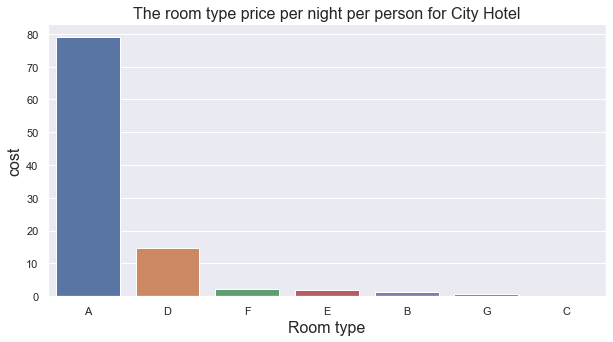

In [37]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(10,5))
sns.barplot(x,y, data= room_prices)
plt.title('The room type price per night per person for City Hotel', fontsize=16)
plt.xlabel('Room type', fontsize = 16)
plt.ylabel('cost', fontsize = 16)
plt.show()

In [38]:
x, y = get_count(data[data['hotel'] != 'City Hotel']['reserved_room_type'])
print(x,y)

['A' 'D' 'E' 'G' 'F' 'C' 'H' 'L' 'B'] [5.84038754e+01 1.85581941e+01 1.24403826e+01 4.02027618e+00
 2.76175494e+00 2.29230654e+00 1.50073663e+00 1.49823957e-02
 7.49119784e-03]


C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


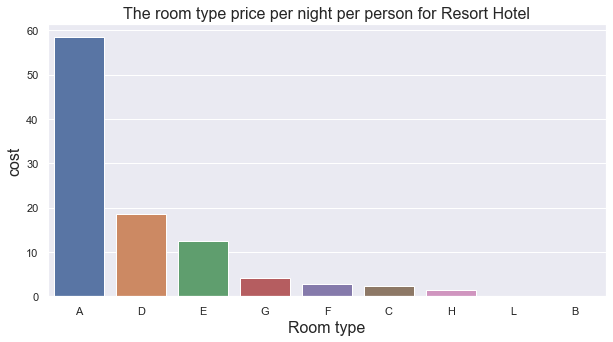

In [39]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(10,5))
sns.barplot(x,y, data= room_prices)
plt.title('The room type price per night per person for Resort Hotel', fontsize=16)
plt.xlabel('Room type', fontsize = 16)
plt.ylabel('cost', fontsize = 16)
plt.show()

### Comparing two hotels based on room type 

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

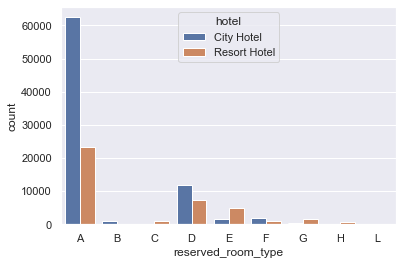

In [40]:
# Plotting a bar graph using seaborn library
sns.countplot(x = 'reserved_room_type', data = data.sort_values('reserved_room_type'), hue='hotel') 

## 10. What conclusions can you draw based on market segment?

In [41]:
# Let us sort the values based on different market segment
data_canceled = data[data['is_canceled'] == 1].sort_values('market_segment')
data_not_canceled = data[data['is_canceled'] == 0].sort_values('market_segment')

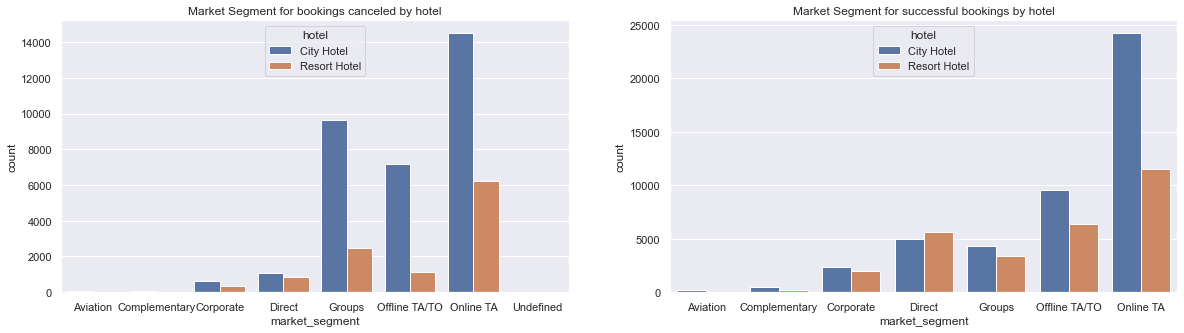

In [42]:
# Plotting a bar graph using seaborn library
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=data_canceled, x= 'market_segment', hue='hotel', ax =ax[0])
sns.countplot(data=data_not_canceled, x= 'market_segment', hue='hotel', ax =ax[1])
ax[0].set(title='Market Segment for bookings canceled by hotel')
ax[1].set(title='Market Segment for successful bookings by hotel')
plt.show()

That looks Great! We can understand that online TA company got cancelled the maximum booking from City Hotel and Resort Hotel. But compared to City Hotel its cancellation count is less for Resort Hotel.

We can see that online TA company have the maximum successful booking by City Hotel and Resort Hotel. But compared to City Hotel its successful booking count is less for Resort Hotel.

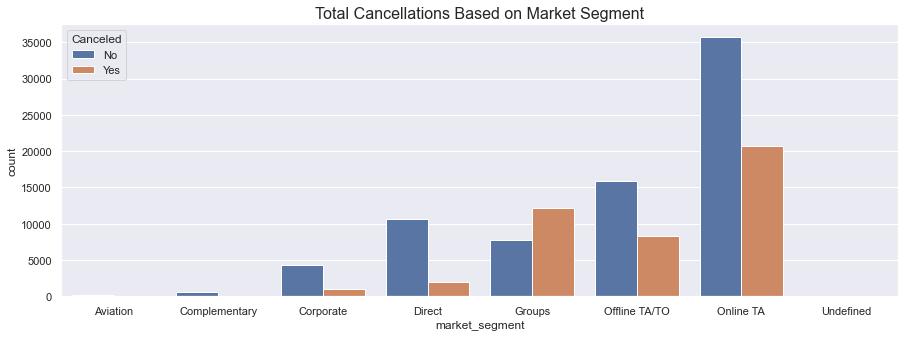

In [43]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(15,5))
sns.countplot(x='market_segment', data=data.sort_values('market_segment'), hue = 'is_canceled')

plt.legend(title='Canceled', loc='best', labels=['No', 'Yes'])
plt.title('Total Cancellations Based on Market Segment', size = 16)
plt.show()

Online TA company didnot cancelled max booking where as it was the one to do max number of successful bookings

## 11. How many people who bought children along them?

In [44]:
# Let us seperate the pepople who bought children from not bought
adult_only = data[(data['adults'] != 0) & (data['children'] == 0) & (data['babies'] == 0)].sort_values('reserved_room_type')
adult_child = data[(data['adults'] != 0) & (data['children'] != 0) | (data['babies'] != 0)].sort_values('reserved_room_type')

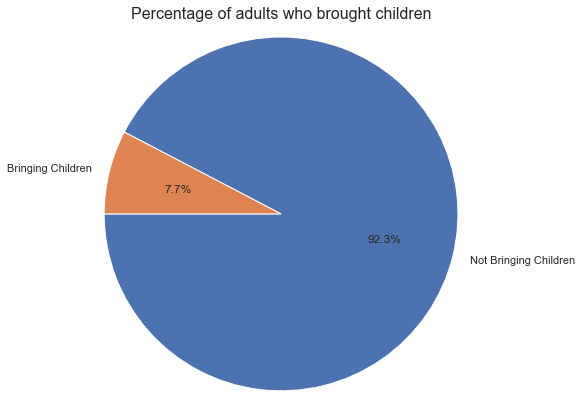

In [45]:
# Plotting a pie chart using matplotlib library
percentage = [(len(adult_only)/(len(adult_only) + len(adult_child)))*100, (len(adult_child)/(len(adult_only) + len(adult_child)))*100]
labels = 'Not Bringing Children', 'Bringing Children'

f, ax = plt.subplots(figsize=(7,7))
ax.pie(percentage, labels = labels, autopct='%1.1f%%' , startangle = 180)
ax.axis('equal')

ax.set_title('Percentage of adults who brought children', fontsize=16)
plt.show()

Only 7.7% of people bought children along them. Whereas maximum people prefered not to bring children along them.

## 12. Get the cancellation values in percentage Hotel wise 

In [46]:
total_cancelations = data['is_canceled'].sum()
rh_cancelations = data.loc[data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = data.loc[data["hotel"] == "City Hotel"]["is_canceled"].sum()

# mencari persentase
rel_cancel = (total_cancelations / data.shape[0]) * 100
rh_rel_cancel = (rh_cancelations / data.loc[data["hotel"] == "Resort Hotel"].shape[0]) * 100
ch_rel_cancel = (ch_cancelations / data.loc[data["hotel"] == "City Hotel"].shape[0]) * 100

print(f"Bookings were canceled: {total_cancelations:} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings are canceled: {rh_cancelations:} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings are canceled: {ch_cancelations:} ({ch_rel_cancel:.0f} %)")

Bookings were canceled: 44199 (37 %)
Resort hotel bookings are canceled: 11120 (28 %)
City hotel bookings are canceled: 33079 (42 %)


## 13. How much was month wise cancellation for each hotel ?

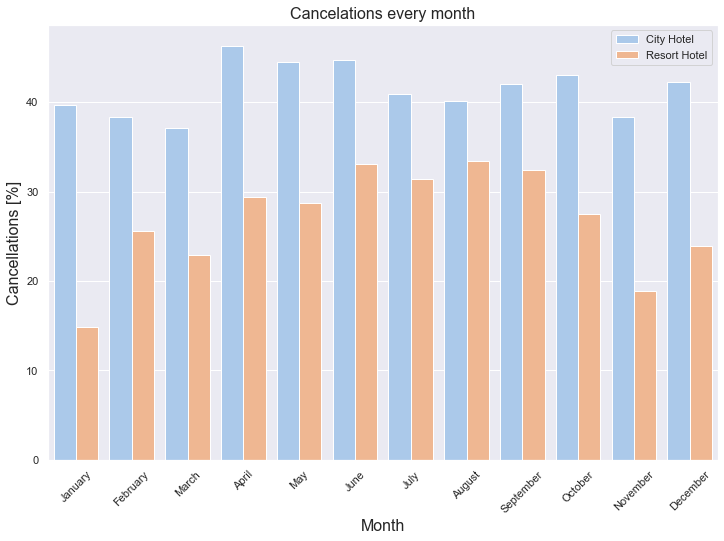

In [47]:
res_book_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})

cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data, palette = 'pastel')
plt.title("Cancelations every month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

City hotel got maximum cancellation for each month, which ranged between 35-45% of cancellation.

## Distribusion  of ADR

C:\Users\JARVIS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

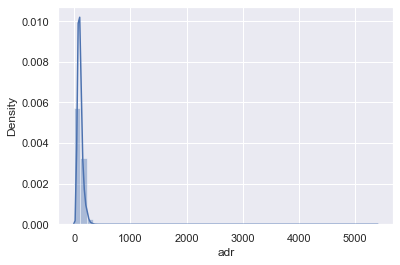

In [48]:
# Plotting a distribution graph using seaborn library
sns.distplot(data[data['adr'] > 0]['adr'])

## Correlation matrix 

<AxesSubplot:>

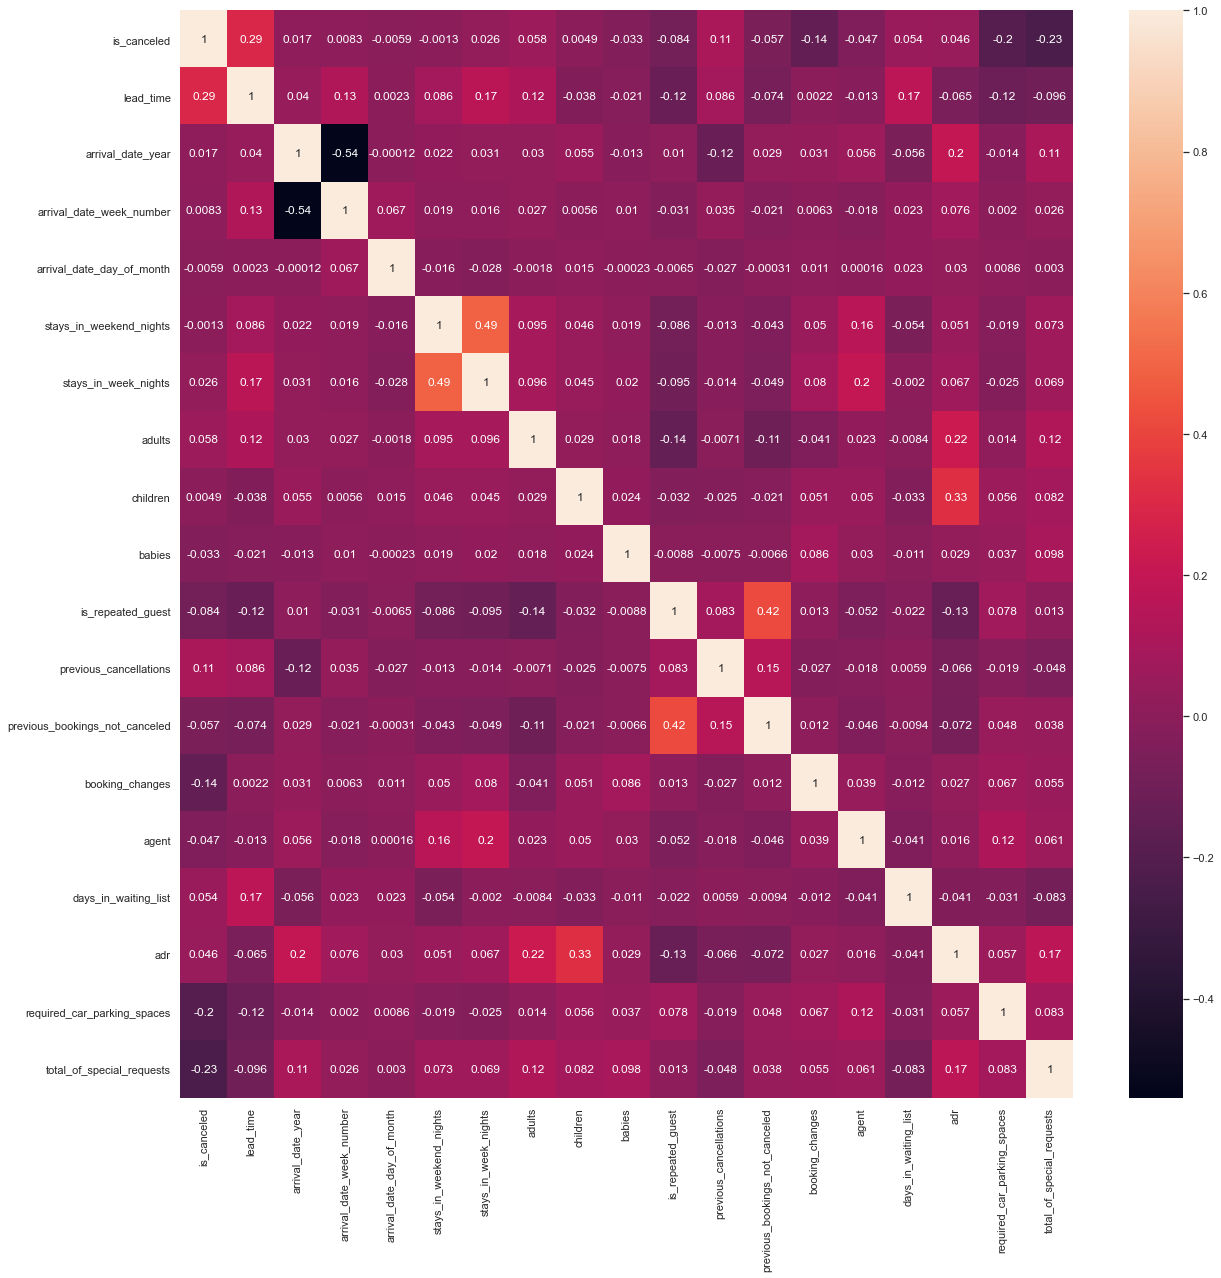

In [49]:
# Plotting a correlational matrix 
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)